<a href="https://colab.research.google.com/github/gfsandovalv/Termodin-micaME/blob/main/1_Caracterizaci%C3%B3n_de_Term%C3%B3metros/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caracterización de Termómetros

## Clase LinModel para ajustar y graficar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import t

class LinModel():
    def __init__(self, dataframe, xlabel='x', ylabel='y'):
        self.x = dataframe[xlabel].copy()
        self.y = dataframe[ylabel].copy()
        
        def stat_error(std, dof):
            t_95 = t.isf(0.025, dof)
            return std*t_95

        coef, cov = np.polyfit(self.x, self.y, 1, cov=True)

        self.m, self.b = coef
        std_m, std_b = np.sqrt(np.diag(cov))
        unc_m, unc_b = (stat_error(std_m, len(self.x)-2), stat_error(std_b, len(self.x)-2))
        
        # Falta añadir el error experimental, solo se reporta el estadístico!
        self.stat_summary = pd.DataFrame(
            data={
                'Parámetro' : ['m', 'b'], 
                'Valor estimado':[self.m, self.b],
                'Error estándar': [std_m, std_b], 
                'Incertidumbre':[unc_m, unc_b]
            })
        
    def prediction_func(self, x):
        return self.m*x + self.b   
    
    def plot(self, yerr=None, xerr=None, 
             x_var_name='x', y_var_name='y', 
             colors=['orange', 'red'], 
             plot_data=True, data_label='data', plot_fit=True, 
             x_var_units = 'xunits', y_var_units = 'yunits',
             title=''):
        self.ln_expression_latex = '$' + y_var_name + '(' + x_var_name + ') = ' + str(round(self.m, 1)) + x_var_name + ' + ' + str(round(self.b, 1)) + '$'
                
        #self.stat_info_latex = '\n$R^2 = $' + str(round(self.ln_result.rvalue**2, 4)) + '\n $\sigma_{N-1} = $' + str(round(self.ln_result.stderr, 5))
        if plot_data == True:
            plt.errorbar(self.x, self.y, yerr=yerr, xerr=xerr, marker = '.', ls='none', ms='5',color = colors[0], ecolor = colors[1], elinewidth = 2, capsize=5, label=data_label)
        if plot_fit == True:
            plt.plot(self.x, self.x.apply(self.prediction_func), ls='--', color=colors[1], label=self.ln_expression_latex)
        plt.xlabel('$' + x_var_name + '$' + ' (' + x_var_units + ')')
        plt.ylabel('$' + y_var_name + '(' + x_var_name + ')' + '$' + ' (' + y_var_units + ')')
        # Agregar título
        plt.legend() 

## Datos
Están en [este](https://github.com/gfsandovalv/Termodin-micaME/tree/main/1_Caracterizaci%C3%B3n_de_Term%C3%B3metros) repositorio.

<AxesSubplot:xlabel='T', ylabel='V'>

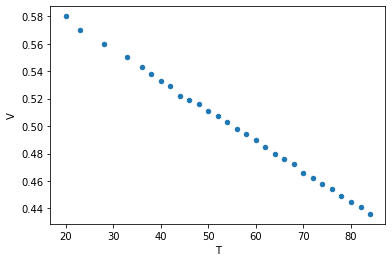

In [6]:
# Prefix path
github_prefix = 'https://raw.githubusercontent.com/gfsandovalv/Termodin-micaME/main/1_Caracterizaci%C3%B3n_de_Term%C3%B3metros/'

# Data reading
termopar_data = pd.read_csv(github_prefix + 'termopar_data.csv')
termistor_data = pd.read_csv(github_prefix + 'termistor_data.csv')
bobina_data = pd.read_csv(github_prefix + 'termistor_bobina_data.csv')
diodo_data = pd.read_csv(github_prefix + 'diodo_data.csv')
diodo_data.plot(x='T', y='V', kind='scatter')

## Termopar

,Parámetro,Valor estimado,Error estándar,Incertidumbre
0,m,17.976675,0.172456,0.354489
1,b,21.015236,0.349730,0.718880


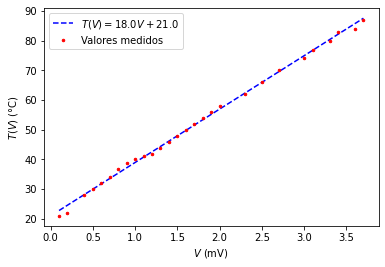

In [ ]:
termopar_model = LinModel(termopar_data, xlabel='V', ylabel='T')
termopar_model.plot(y_var_name='T', x_var_name='V', data_label='Valores medidos', colors=['red', 'blue'], y_var_units='°C', x_var_units='mV')
termopar_model.stat_summary